# Notebook 1: Exploração Inicial e Segmentação de Municípios de Rondônia

**Objetivo**: Realizar a exploração inicial dos dados demográficos e econômicos dos 52 municípios de Rondônia para selecionar os 10 municípios que serão objeto de análise aprofundada no artigo.

**Critérios de Seleção**:
- População (IBGE 2024)
- PIB Municipal (IBGE 2021)
- Representatividade econômica e demográfica do estado

## 1. Importação de Bibliotecas

In [ ]:
import pandas as pd

# Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

## 2. Carregamento dos Dados

In [17]:
# Configurar pandas para mostrar todas as linhas
pd.set_option('display.max_rows', None)  # Mostra todas as linhas
pd.set_option('display.max_columns', None)  # Mostra todas as colunas
pd.set_option('display.width', None)  # Sem limite de largura
pd.set_option('display.max_colwidth', None)  # Conteúdo completo das colunas

df_populacao = pd.read_csv('../Data/raw/ibge/populacao_rondonia_2024.txt')
print(f"Dados de população carregados: {len(df_populacao)} municípios")
df_populacao  # Em Jupyter, isso mostrará tudo

Dados de população carregados: 52 municípios


,Cod_IBGE,Municipio,Populacao_2024
0,1100015,Alta Floresta D'Oeste,22853
1,1100023,Ariquemes,108573
2,1100031,Cabixi,5690
3,1100049,Cacoal,97637
4,1100056,Cerejeiras,16975
5,1100064,Colorado do Oeste,16588
6,1100072,Corumbiara,8001
7,1100080,Costa Marques,13522
8,1100098,Espigão D'Oeste,32717
9,1100106,Guajará-Mirim,43553


In [18]:
# Carregar dados de PIB (IBGE 2021)
df_pib = pd.read_csv('../Data/raw/ibge/pib_municipios_rondonia_2021.csv', encoding='utf-8-sig')
print(f"Dados de PIB carregados: {len(df_pib)} municípios")
df_pib

Dados de PIB carregados: 52 municípios


,Cod_Municipio,Municipio,Ano,PIB_Mil_Reais
0,1100205,Porto Velho - RO,2021,20059522
1,1100122,Ji-Paraná - RO,2021,4231113
2,1100304,Vilhena - RO,2021,4215046
3,1100023,Ariquemes - RO,2021,3209761
4,1100049,Cacoal - RO,2021,2792383
5,1100114,Jaru - RO,2021,1765089
6,1100189,Pimenta Bueno - RO,2021,1642516
7,1100288,Rolim de Moura - RO,2021,1565194
8,1100106,Guajará-Mirim - RO,2021,1054179
9,1100155,Ouro Preto do Oeste - RO,2021,985868


## 3. Preparação e Integração dos Dados

In [20]:
# Padronizar códigos IBGE para merge
df_populacao['Cod_IBGE'] = df_populacao['Cod_IBGE'].astype(str)
df_pib['Cod_IBGE'] = df_pib['Cod_Municipio'].astype(str)

# Limpar nome dos municípios no dataframe de PIB (remover ' - RO')
df_pib['Municipio_Limpo'] = df_pib['Municipio'].str.replace(' - RO', '', regex=False)

# Realizar merge dos dados
df_municipios = pd.merge(
    df_populacao,
    df_pib[['Cod_IBGE', 'Municipio_Limpo', 'PIB_Mil_Reais']],
    left_on='Cod_IBGE',
    right_on='Cod_IBGE',
    how='inner'
)

# Renomear colunas
df_municipios = df_municipios.rename(columns={
    'Populacao_2024': 'Populacao',
    'PIB_Mil_Reais': 'PIB_Milhares_Reais'
})

# Calcular PIB per capita
df_municipios['PIB_Per_Capita'] = (df_municipios['PIB_Milhares_Reais'] * 1000) / df_municipios['Populacao']

print(f"\nDataset integrado: {len(df_municipios)} municípios")
df_municipios.head(52)


Dataset integrado: 52 municípios


,Cod_IBGE,Municipio,Populacao,Municipio_Limpo,PIB_Milhares_Reais,PIB_Per_Capita
0,1100015,Alta Floresta D'Oeste,22853,Alta Floresta D'Oeste,734469,32138.843915
1,1100023,Ariquemes,108573,Ariquemes,3209761,29563.160270
2,1100031,Cabixi,5690,Cabixi,238412,41900.175747
3,1100049,Cacoal,97637,Cacoal,2792383,28599.639481
4,1100056,Cerejeiras,16975,Cerejeiras,743037,43772.430044
5,1100064,Colorado do Oeste,16588,Colorado do Oeste,424807,25609.295877
6,1100072,Corumbiara,8001,Corumbiara,396728,49584.801900
7,1100080,Costa Marques,13522,Costa Marques,316671,23418.946901
8,1100098,Espigão D'Oeste,32717,Espigão D'Oeste,773381,23638.505975
9,1100106,Guajará-Mirim,43553,Guajará-Mirim,1054179,24204.509448


## 4. Análise Exploratória

In [21]:
# Estatísticas descritivas
print("=" * 80)
print("ESTATÍSTICAS DESCRITIVAS - MUNICÍPIOS DE RONDÔNIA")
print("=" * 80)
print("\nPOPULAÇÃO (2024):")
print(df_municipios['Populacao'].describe())
print(f"\nTotal da população de Rondônia: {df_municipios['Populacao'].sum():,.0f} habitantes")

print("\n" + "=" * 80)
print("PIB MUNICIPAL (2021 - em milhares de reais):")
print(df_municipios['PIB_Milhares_Reais'].describe())
print(f"\nPIB total de Rondônia: R$ {df_municipios['PIB_Milhares_Reais'].sum():,.0f} mil")

print("\n" + "=" * 80)
print("PIB PER CAPITA (2021):")
print(df_municipios['PIB_Per_Capita'].describe())

ESTATÍSTICAS DESCRITIVAS - MUNICÍPIOS DE RONDÔNIA

POPULAÇÃO (2024):
count        52.000000
mean      33581.288462
std       74181.289561
min        2311.000000
25%        7970.000000
50%       13238.000000
75%       29054.250000
max      514873.000000
Name: Populacao, dtype: float64

Total da população de Rondônia: 1,746,227 habitantes

PIB MUNICIPAL (2021 - em milhares de reais):
count    5.200000e+01
mean     1.118656e+06
std      2.836469e+06
min      9.962700e+04
25%      2.391005e+05
50%      4.107675e+05
75%      8.026158e+05
max      2.005952e+07
Name: PIB_Milhares_Reais, dtype: float64

PIB total de Rondônia: R$ 58,170,098 mil

PIB PER CAPITA (2021):
count        52.000000
mean      33465.069941
std       13339.201116
min       22807.145184
25%       26118.801127
50%       29026.266621
75%       38868.779527
max      106537.862397
Name: PIB_Per_Capita, dtype: float64


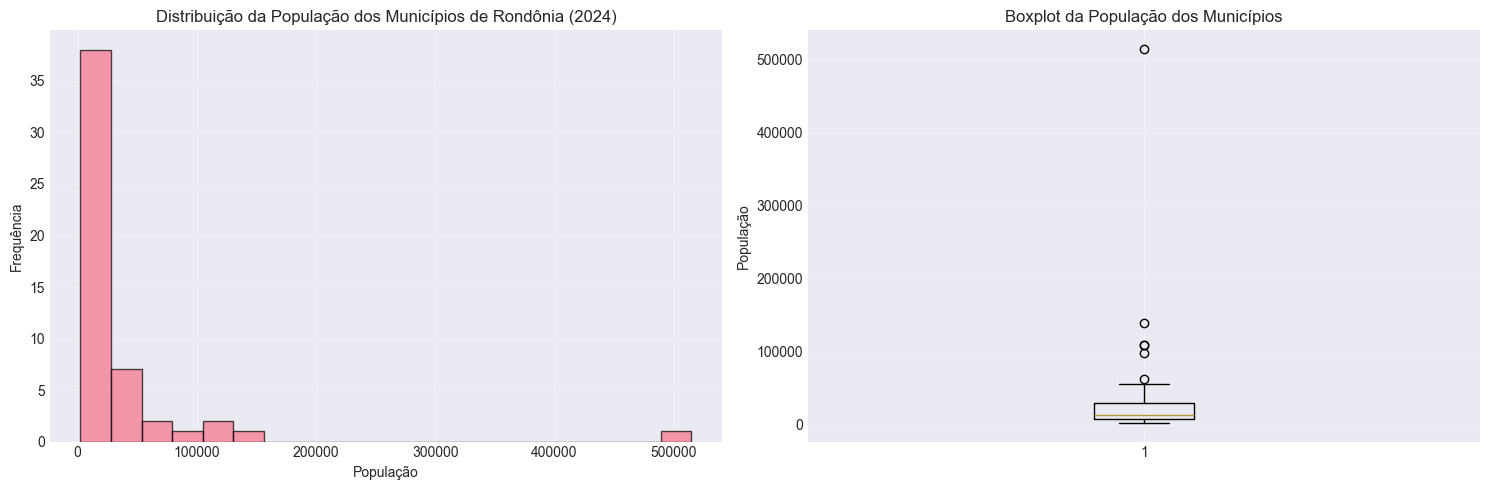

Gráfico salvo: distribuicao_populacional.png


In [22]:
# Visualização da distribuição populacional
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histograma de população
axes[0].hist(df_municipios['Populacao'], bins=20, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('População')
axes[0].set_ylabel('Frequência')
axes[0].set_title('Distribuição da População dos Municípios de Rondônia (2024)')
axes[0].grid(True, alpha=0.3)

# Boxplot de população
axes[1].boxplot(df_municipios['Populacao'], vert=True)
axes[1].set_ylabel('População')
axes[1].set_title('Boxplot da População dos Municípios')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('distribuicao_populacional.png', dpi=300, bbox_inches='tight')
plt.show()

print("Gráfico salvo: distribuicao_populacional.png")

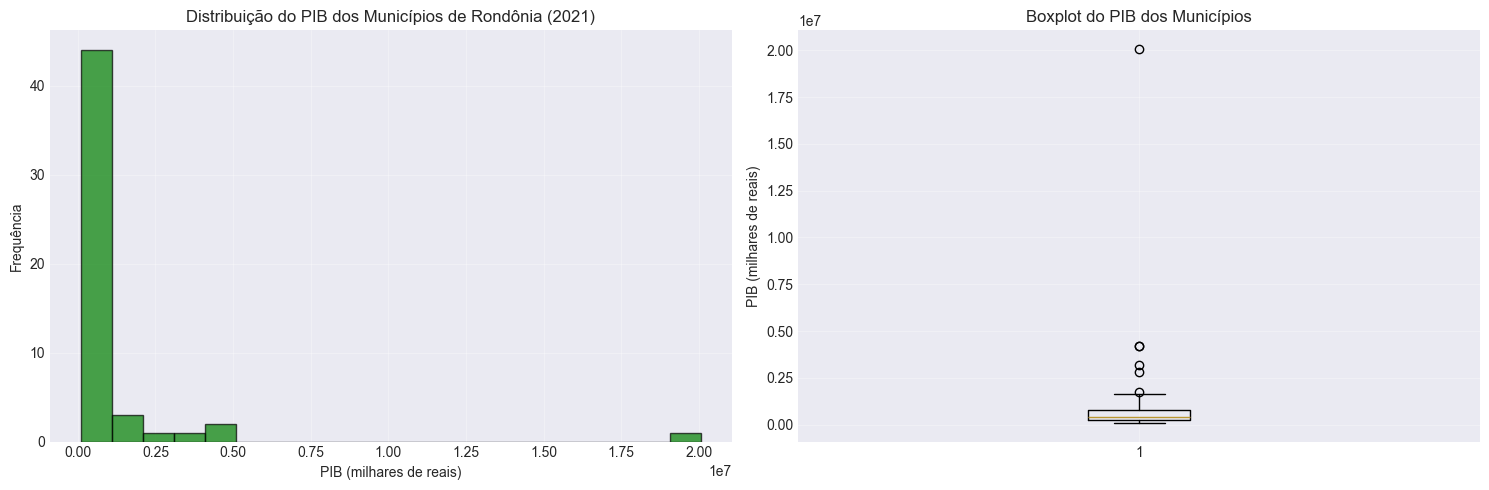

Gráfico salvo: distribuicao_pib.png


In [23]:
# Visualização da distribuição do PIB
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histograma de PIB
axes[0].hist(df_municipios['PIB_Milhares_Reais'], bins=20, edgecolor='black', alpha=0.7, color='green')
axes[0].set_xlabel('PIB (milhares de reais)')
axes[0].set_ylabel('Frequência')
axes[0].set_title('Distribuição do PIB dos Municípios de Rondônia (2021)')
axes[0].grid(True, alpha=0.3)

# Boxplot de PIB
axes[1].boxplot(df_municipios['PIB_Milhares_Reais'], vert=True)
axes[1].set_ylabel('PIB (milhares de reais)')
axes[1].set_title('Boxplot do PIB dos Municípios')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('distribuicao_pib.png', dpi=300, bbox_inches='tight')
plt.show()

print("Gráfico salvo: distribuicao_pib.png")

## 5. Ranking e Seleção dos 10 Municípios

In [24]:
# Criar ranking por população
df_ranking_pop = df_municipios.sort_values('Populacao', ascending=False).reset_index(drop=True)
df_ranking_pop['Ranking_Pop'] = df_ranking_pop.index + 1
df_ranking_pop['Perc_Pop'] = (df_ranking_pop['Populacao'] / df_ranking_pop['Populacao'].sum()) * 100

print("=" * 100)
print("TOP 10 MUNICÍPIOS POR POPULAÇÃO (2024)")
print("=" * 100)
print(df_ranking_pop[['Ranking_Pop', 'Municipio', 'Populacao', 'Perc_Pop']].head(10).to_string(index=False))
print(f"\nPopulação total dos Top 10: {df_ranking_pop['Populacao'].head(10).sum():,.0f} habitantes")
print(f"Percentual do estado: {df_ranking_pop['Perc_Pop'].head(10).sum():.2f}%")

TOP 10 MUNICÍPIOS POR POPULAÇÃO (2024)
 Ranking_Pop           Municipio  Populacao  Perc_Pop
           1         Porto Velho     514873 29.484884
           2           Ji-Paraná     139359  7.980578
           3           Ariquemes     108573  6.217577
           4             Vilhena     108528  6.215000
           5              Cacoal      97637  5.591312
           6      Rolim de Moura      62559  3.582524
           7                Jaru      55583  3.183034
           8       Guajará-Mirim      43553  2.494120
           9       Pimenta Bueno      39053  2.236422
          10 Ouro Preto do Oeste      38681  2.215119

População total dos Top 10: 1,208,399 habitantes
Percentual do estado: 69.20%


In [25]:
# Criar ranking por PIB
df_ranking_pib = df_municipios.sort_values('PIB_Milhares_Reais', ascending=False).reset_index(drop=True)
df_ranking_pib['Ranking_PIB'] = df_ranking_pib.index + 1
df_ranking_pib['Perc_PIB'] = (df_ranking_pib['PIB_Milhares_Reais'] / df_ranking_pib['PIB_Milhares_Reais'].sum()) * 100

print("=" * 100)
print("TOP 10 MUNICÍPIOS POR PIB (2021)")
print("=" * 100)
print(df_ranking_pib[['Ranking_PIB', 'Municipio_Limpo', 'PIB_Milhares_Reais', 'Perc_PIB']].head(10).to_string(index=False))
print(f"\nPIB total dos Top 10: R$ {df_ranking_pib['PIB_Milhares_Reais'].head(10).sum():,.0f} mil")
print(f"Percentual do estado: {df_ranking_pib['Perc_PIB'].head(10).sum():.2f}%")

TOP 10 MUNICÍPIOS POR PIB (2021)
 Ranking_PIB     Municipio_Limpo  PIB_Milhares_Reais  Perc_PIB
           1         Porto Velho            20059522 34.484250
           2           Ji-Paraná             4231113  7.273691
           3             Vilhena             4215046  7.246070
           4           Ariquemes             3209761  5.517888
           5              Cacoal             2792383  4.800375
           6                Jaru             1765089  3.034358
           7       Pimenta Bueno             1642516  2.823643
           8      Rolim de Moura             1565194  2.690719
           9       Guajará-Mirim             1054179  1.812235
          10 Ouro Preto do Oeste              985868  1.694802

PIB total dos Top 10: R$ 41,520,671 mil
Percentual do estado: 71.38%


In [26]:
# Criar ranking combinado (média dos rankings)
df_ranking_combinado = df_municipios.copy()
df_ranking_combinado = df_ranking_combinado.sort_values('Populacao', ascending=False).reset_index(drop=True)
df_ranking_combinado['Ranking_Pop'] = df_ranking_combinado.index + 1

df_ranking_combinado = df_ranking_combinado.sort_values('PIB_Milhares_Reais', ascending=False).reset_index(drop=True)
df_ranking_combinado['Ranking_PIB'] = df_ranking_combinado.index + 1

# Calcular ranking médio
df_ranking_combinado['Ranking_Medio'] = (df_ranking_combinado['Ranking_Pop'] + df_ranking_combinado['Ranking_PIB']) / 2
df_ranking_combinado = df_ranking_combinado.sort_values('Ranking_Medio').reset_index(drop=True)
df_ranking_combinado['Ranking_Final'] = df_ranking_combinado.index + 1

print("=" * 120)
print("TOP 10 MUNICÍPIOS - RANKING COMBINADO (População + PIB)")
print("=" * 120)
print(df_ranking_combinado[[
    'Ranking_Final', 'Municipio', 'Populacao', 'Ranking_Pop', 
    'PIB_Milhares_Reais', 'Ranking_PIB', 'PIB_Per_Capita'
]].head(10).to_string(index=False))

TOP 10 MUNICÍPIOS - RANKING COMBINADO (População + PIB)
 Ranking_Final           Municipio  Populacao  Ranking_Pop  PIB_Milhares_Reais  Ranking_PIB  PIB_Per_Capita
             1         Porto Velho     514873            1            20059522            1    38960.135800
             2           Ji-Paraná     139359            2             4231113            2    30361.246852
             3             Vilhena     108528            4             4215046            3    38838.327436
             4           Ariquemes     108573            3             3209761            4    29563.160270
             5              Cacoal      97637            5             2792383            5    28599.639481
             6                Jaru      55583            7             1765089            6    31755.914578
             7      Rolim de Moura      62559            6             1565194            8    25019.485606
             8       Pimenta Bueno      39053            9             1642516  

In [27]:
# Selecionar os 10 municípios para análise
municipios_selecionados = df_ranking_combinado.head(10).copy()

# Salvar lista de municípios selecionados
municipios_selecionados.to_csv('municipios_selecionados.csv', index=False, encoding='utf-8-sig')

print("\n" + "=" * 80)
print("MUNICÍPIOS SELECIONADOS PARA ANÁLISE APROFUNDADA")
print("=" * 80)
for idx, row in municipios_selecionados.iterrows():
    print(f"{row['Ranking_Final']}. {row['Municipio']} (Código IBGE: {row['Cod_IBGE']})")

print("\nArquivo salvo: municipios_selecionados.csv")


MUNICÍPIOS SELECIONADOS PARA ANÁLISE APROFUNDADA
1. Porto Velho (Código IBGE: 1100205)
2. Ji-Paraná (Código IBGE: 1100122)
3. Vilhena (Código IBGE: 1100304)
4. Ariquemes (Código IBGE: 1100023)
5. Cacoal (Código IBGE: 1100049)
6. Jaru (Código IBGE: 1100114)
7. Rolim de Moura (Código IBGE: 1100288)
8. Pimenta Bueno (Código IBGE: 1100189)
9. Guajará-Mirim (Código IBGE: 1100106)
10. Ouro Preto do Oeste (Código IBGE: 1100155)

Arquivo salvo: municipios_selecionados.csv


## 6. Visualizações dos Municípios Selecionados

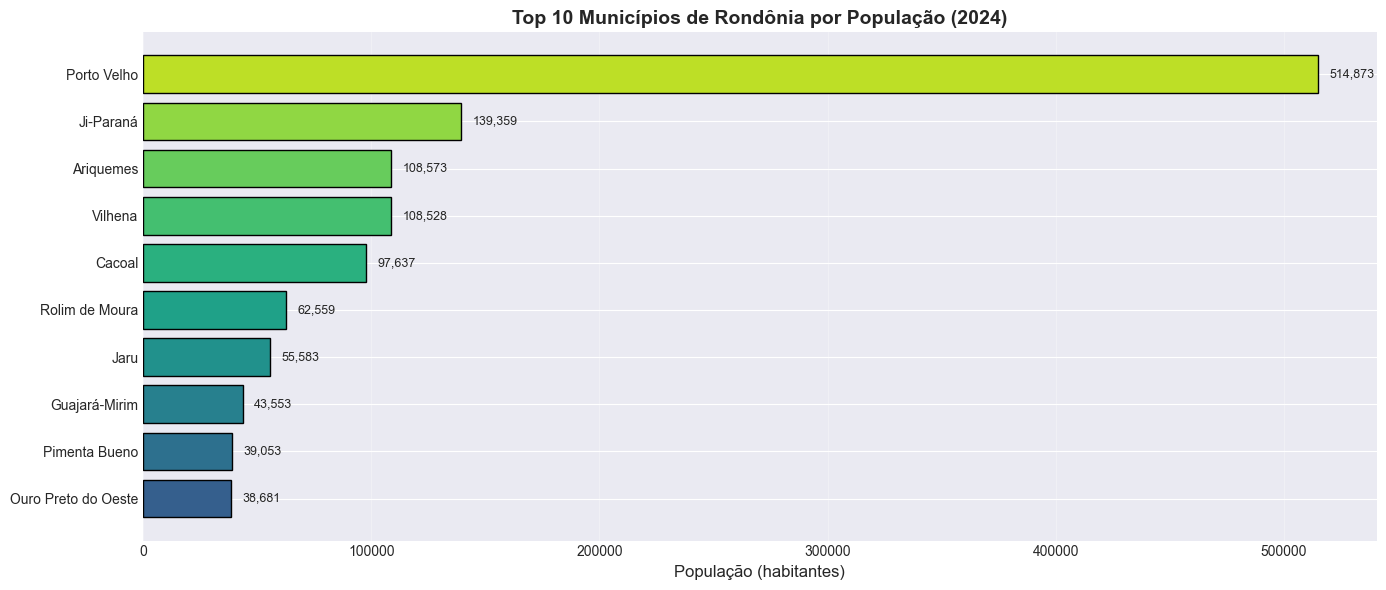

Gráfico salvo: top10_populacao.png


In [28]:
# Gráfico de barras - População dos Top 10
fig, ax = plt.subplots(figsize=(14, 6))

municipios_selecionados_sorted = municipios_selecionados.sort_values('Populacao', ascending=True)
colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(municipios_selecionados_sorted)))

ax.barh(municipios_selecionados_sorted['Municipio'], 
        municipios_selecionados_sorted['Populacao'],
        color=colors,
        edgecolor='black')

ax.set_xlabel('População (habitantes)', fontsize=12)
ax.set_title('Top 10 Municípios de Rondônia por População (2024)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='x')

# Adicionar valores nas barras
for i, (idx, row) in enumerate(municipios_selecionados_sorted.iterrows()):
    ax.text(row['Populacao'] + 5000, i, f"{row['Populacao']:,.0f}", 
            va='center', fontsize=9)

plt.tight_layout()
plt.savefig('top10_populacao.png', dpi=300, bbox_inches='tight')
plt.show()

print("Gráfico salvo: top10_populacao.png")

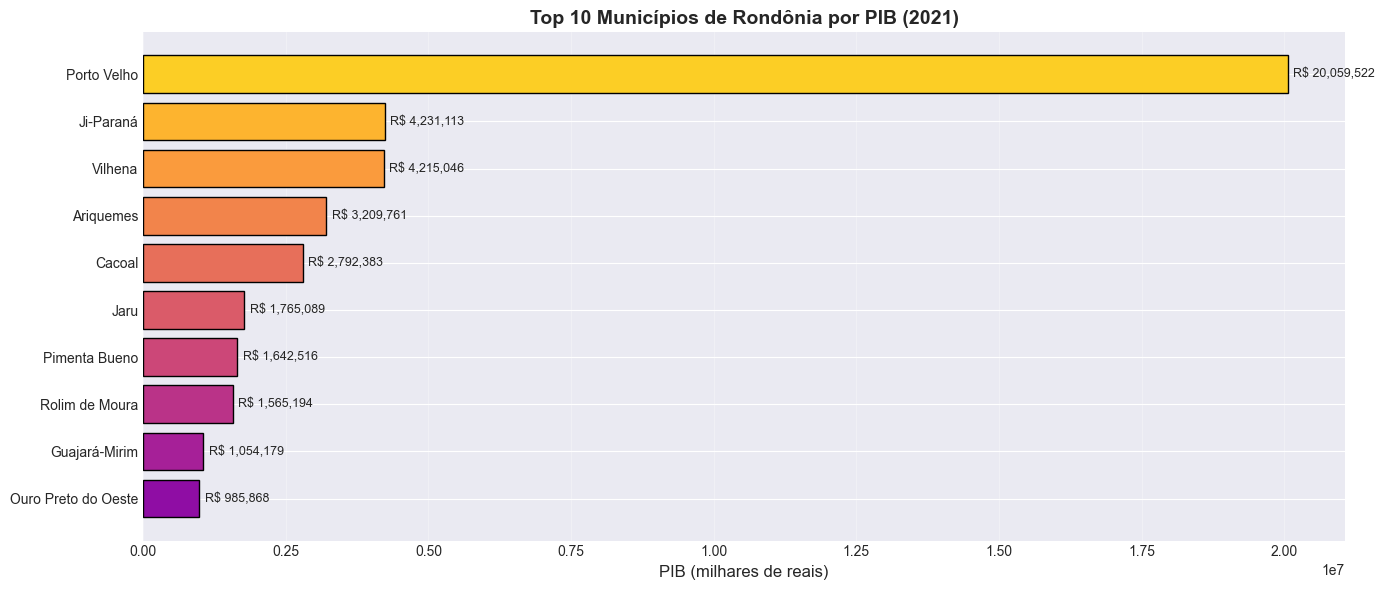

Gráfico salvo: top10_pib.png


In [31]:
# Gráfico de barras - PIB dos Top 10
fig, ax = plt.subplots(figsize=(14, 6))

municipios_selecionados_sorted_pib = municipios_selecionados.sort_values('PIB_Milhares_Reais', ascending=True)
colors = plt.cm.plasma(np.linspace(0.3, 0.9, len(municipios_selecionados_sorted_pib)))

ax.barh(municipios_selecionados_sorted_pib['Municipio'], 
        municipios_selecionados_sorted_pib['PIB_Milhares_Reais'],
        color=colors,
        edgecolor='black')

ax.set_xlabel('PIB (milhares de reais)', fontsize=12)
ax.set_title('Top 10 Municípios de Rondônia por PIB (2021)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='x')

# Adicionar valores nas barras
for i, (idx, row) in enumerate(municipios_selecionados_sorted_pib.iterrows()):
    ax.text(row['PIB_Milhares_Reais'] + 100000, i, f"R$ {row['PIB_Milhares_Reais']:,.0f}",
            va='center', fontsize=9)

plt.tight_layout()
plt.savefig('top10_pib.png', dpi=300, bbox_inches='tight')
plt.show()

print("Gráfico salvo: top10_pib.png")

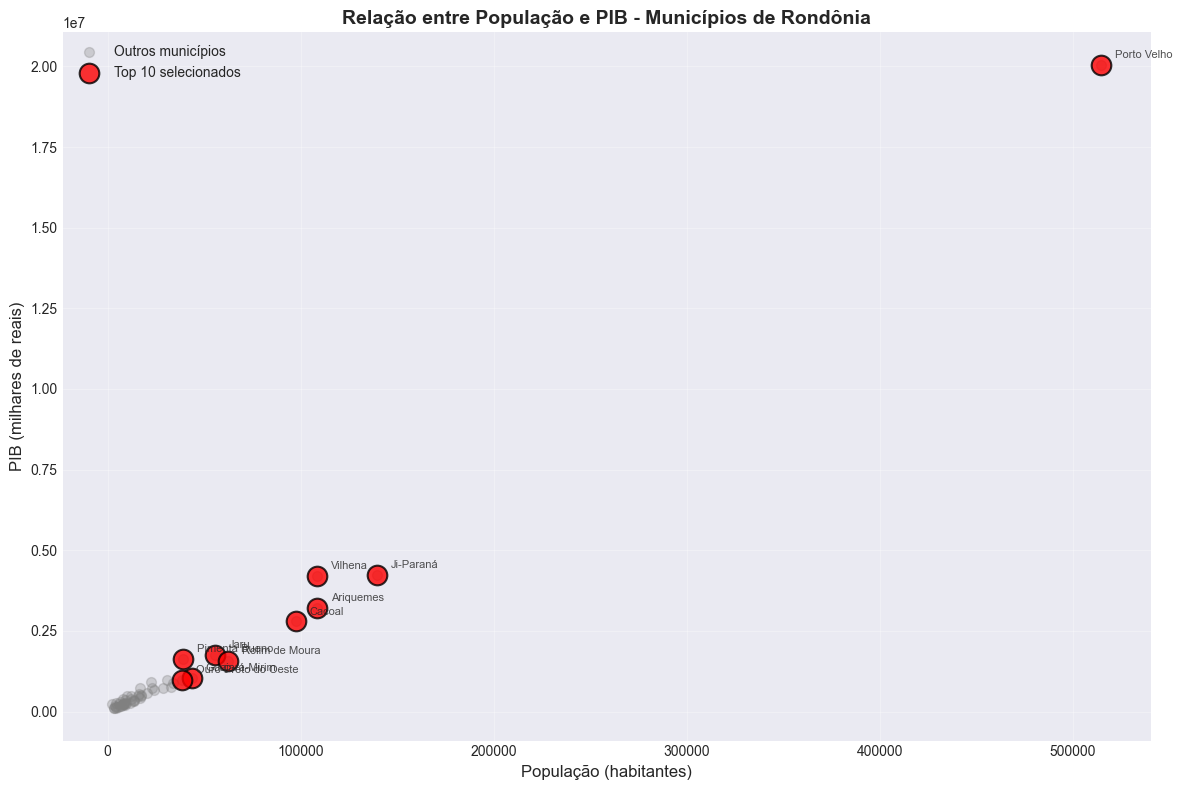

Gráfico salvo: populacao_vs_pib.png


In [30]:
# Gráfico de dispersão - População vs PIB
fig, ax = plt.subplots(figsize=(12, 8))

# Plotar todos os municípios em cinza
ax.scatter(df_municipios['Populacao'], 
          df_municipios['PIB_Milhares_Reais'],
          alpha=0.3, s=50, color='gray', label='Outros municípios')

# Destacar os 10 selecionados
ax.scatter(municipios_selecionados['Populacao'], 
          municipios_selecionados['PIB_Milhares_Reais'],
          alpha=0.8, s=200, color='red', edgecolor='black', 
          linewidth=1.5, label='Top 10 selecionados')

# Adicionar labels para os municípios selecionados
for idx, row in municipios_selecionados.iterrows():
    ax.annotate(row['Municipio'], 
               (row['Populacao'], row['PIB_Milhares_Reais']),
               xytext=(10, 5), textcoords='offset points',
               fontsize=8, alpha=0.8)

ax.set_xlabel('População (habitantes)', fontsize=12)
ax.set_ylabel('PIB (milhares de reais)', fontsize=12)
ax.set_title('Relação entre População e PIB - Municípios de Rondônia', 
            fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('populacao_vs_pib.png', dpi=300, bbox_inches='tight')
plt.show()

print("Gráfico salvo: populacao_vs_pib.png")

## 7. Análise de Correlação

MATRIZ DE CORRELAÇÃO
                    Populacao  PIB_Milhares_Reais  PIB_Per_Capita
Populacao            1.000000            0.994801       -0.005301
PIB_Milhares_Reais   0.994801            1.000000        0.038147
PIB_Per_Capita      -0.005301            0.038147        1.000000


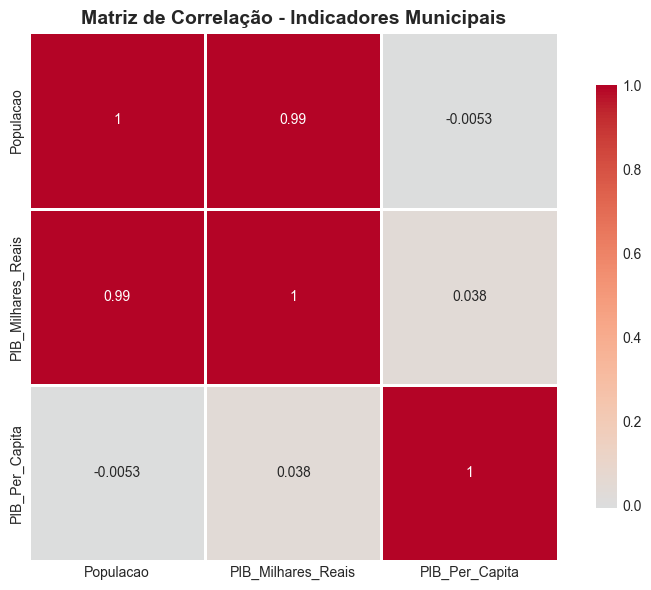


Gráfico salvo: matriz_correlacao.png


In [32]:
# Calcular correlação entre população e PIB
correlacao = df_municipios[['Populacao', 'PIB_Milhares_Reais', 'PIB_Per_Capita']].corr()

print("=" * 80)
print("MATRIZ DE CORRELAÇÃO")
print("=" * 80)
print(correlacao)

# Visualizar matriz de correlação
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
ax.set_title('Matriz de Correlação - Indicadores Municipais', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('matriz_correlacao.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nGráfico salvo: matriz_correlacao.png")

## 8. Resumo e Conclusões

In [35]:
print("=" * 100)
print("RESUMO DA SEGMENTAÇÃO")
print("=" * 100)

print(f"\nTotal de municípios em Rondônia: {len(df_municipios)}")
print(f"Municípios selecionados para análise: {len(municipios_selecionados)}")

print(f"\nPopulação total de Rondônia: {df_municipios['Populacao'].sum():,.0f} habitantes")
print(f"População dos municípios selecionados: {municipios_selecionados['Populacao'].sum():,.0f} habitantes")
print(f"Percentual representado: {(municipios_selecionados['Populacao'].sum() / df_municipios['Populacao'].sum()) * 100:.2f}%")

print(f"\nPIB total de Rondônia: R$ {df_municipios['PIB_Milhares_Reais'].sum():,.0f} mil")
print(f"PIB dos municípios selecionados: R$ {municipios_selecionados['PIB_Milhares_Reais'].sum():,.0f} mil")
print(f"Percentual representado: {(municipios_selecionados['PIB_Milhares_Reais'].sum() / df_municipios['PIB_Milhares_Reais'].sum()) * 100:.2f}%")

print("\n" + "=" * 100)
print("LISTA DOS 10 MUNICÍPIOS SELECIONADOS")
print("=" * 100)
for idx, row in municipios_selecionados.iterrows():
    print(f"{row['Ranking_Final']:2d}. {row['Municipio']:30s} | Pop: {row['Populacao']:>8,.0f} | PIB: R$ {row['PIB_Milhares_Reais']:>12,.0f} mil | PIB p/c: R$ {row['PIB_Per_Capita']:>10,.2f}")

print("\n" + "=" * 100)
print("JUSTIFICATIVA DA SELEÇÃO")
print("=" * 100)
print("""
Os 10 municípios selecionados foram escolhidos com base em um ranking combinado que considera
tanto a população (IBGE 2024) quanto o PIB municipal (IBGE 2021). Este critério garante que:

1. Os municípios selecionados representam a maior parte da população e da economia do estado
2. Há diversidade de portes municipais na amostra
3. A análise terá maior relevância e impacto, pois abrange os principais centros urbanos
4. Os resultados serão mais representativos da realidade estadual

Estes municípios serão objeto de análise aprofundada nos próximos notebooks, incluindo:
- Coleta de dados de transparência (ATRICON)
- Avaliação de conformidade com normas de dados abertos
- Análise de maturidade dos portais de transparência
""")

RESUMO DA SEGMENTAÇÃO

Total de municípios em Rondônia: 52
Municípios selecionados para análise: 10

População total de Rondônia: 1,746,227 habitantes
População dos municípios selecionados: 1,208,399 habitantes
Percentual representado: 69.20%

PIB total de Rondônia: R$ 58,170,098 mil
PIB dos municípios selecionados: R$ 41,520,671 mil
Percentual representado: 71.38%

LISTA DOS 10 MUNICÍPIOS SELECIONADOS
 1. Porto Velho                    | Pop:  514,873 | PIB: R$   20,059,522 mil | PIB p/c: R$  38,960.14
 2. Ji-Paraná                      | Pop:  139,359 | PIB: R$    4,231,113 mil | PIB p/c: R$  30,361.25
 3. Vilhena                        | Pop:  108,528 | PIB: R$    4,215,046 mil | PIB p/c: R$  38,838.33
 4. Ariquemes                      | Pop:  108,573 | PIB: R$    3,209,761 mil | PIB p/c: R$  29,563.16
 5. Cacoal                         | Pop:   97,637 | PIB: R$    2,792,383 mil | PIB p/c: R$  28,599.64
 6. Jaru                           | Pop:   55,583 | PIB: R$    1,765,089 mil |

In [46]:
# Salvar dataset final para uso nos próximos notebooks
municipios_selecionados.to_csv('transparencia-municipal-analise/Data/processed/municipios_selecionados_final2.csv', index=False)
print("\nDataset final salvo: municipios_selecionados_final2.csv")
print("\nPróximo passo: Notebook 2 - Coleta de dados ATRICON")


Dataset final salvo: municipios_selecionados_final2.csv

Próximo passo: Notebook 2 - Coleta de dados ATRICON
